# Classification of b-quark jets in the Aleph simulated data

Python macro for selecting b-jets (sprays of particles with a b-quark in it) in Aleph Z -> qqbar MC (i.e. simulated decays of the Z0 boson decaying to a quark and an anti-quark) in various ways:
* Initially, simply with "if"-statements making requirements on certain variables. This corresponds to selecting "boxes" in the input variable space (typically called "X"). One could also try a Fisher discriminant (linear combination of input variables), which corresponds to a plane in the X-space. But as the problem is non-linear, it is likely to be sub-optimal.

* Next using Machine Learning (ML) methods. We will during the first week try both (Boosted) Decision Tree ((B)DT) based and Neural Net (NN) based methods, and see how complicated (or not) it is to get a good solution, and how much better it performs compared to the "classic" selection method.

Once you obtain a classification of b-jets vs. non-b-jets, think about how to quantify the quality of your algorithm. Also, try to compare it to the NN result of the Aleph collaboration, given by the variable "nnbjet". It is based on a neural network with 6 input variables (prob_b, spheri, pt2rel, multip, bqvjet, and ptlrel), and two hidden layers each with 10 nodes in. Can you do better?

In the end, this exercise is the simple start on moving into the territory of Machine Learning analysis.


### Data:
The input variables (X) are (where Aleph uses only the first six):
* **prob_b**: Probability of being a b-jet from the pointing of the tracks to the vertex.
* **spheri**: Sphericity of the event, i.e. how spherical it is.
* **pt2rel**: The transverse momentum squared of the tracks relative to the jet axis, i.e. width of the jet.
* **multip**: Multiplicity of the jet (in a relative measure).
* **bqvjet**: b-quark vertex of the jet, i.e. the probability of a detached vertex.
* **ptlrel**: Transverse momentum (in GeV) of possible lepton with respect to jet axis (about 0 if no leptons).
* energy: Measured energy of the jet in GeV. Should be 45 GeV, but fluctuates.
* cTheta: cos(theta), i.e. the polar angle of the jet with respect to the beam axis. Note, that the detector works best in the central region (|cTheta| small) and less well in the forward regions.
* phi:    The azimuth angle of the jet. As the detector is uniform in phi, this should not matter (much).

The target variable (Y) is:
* isb:    1 if it is from a b-quark and 0, if it is not.

Finally, those before you (the Aleph collaboration in the mid 90'ies) produced a Neural Net (6 input variables, two hidden layers with 10 neurons in each, and 1 output varible) based classification variable, which you can compare to (and compete with?):
* nnbjet: Value of original Aleph b-jet tagging algorithm, using only the last six variables (for reference).


### Task:
Thus, the task before you is to produce functions (non-ML and then ML algorithm), which given the input variables X provides an output variable estimate, Y_est, which is "closest possible" to the target variable, Y. The "closest possible" is left to the user to define in a _Loss Function_, which we will discuss further. In classification problems (such as this), the typical loss function to use "Cross Entropy", see https://en.wikipedia.org/wiki/Cross_entropy.

Once you have results, you're welcome to continue with a Fisher Linear Discriminant, and you may also challenge yourself by considering "v1" of the data, which is a little less "polished and ready". If you also manage this, then don't hold back in applying a real ML algorithm to the problem (you can get inspiration from "ML_MethodsDemos.ipynb" or the vast internet). A suggestion might be XGBoost or LightGBM.

* Author: Troels C. Petersen (NBI)
* Email:  petersen@nbi.dk
* Date:   17th of April 2023

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import csv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting for plotting
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
sns.set_palette("colorblind")
color = sns.color_palette("colorblind")

Possible other packages to consider:
cornerplot, seaplot, sklearn.decomposition(PCA)

In [3]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

# Evaluate an attempt at classification:

This is made into a function, as this is called many times. It returns a "confusion matrix" and the fraction of wrong classifications.

In [4]:
def evaluate(bquark) :
    N = [[0,0], [0,0]]   # Make a list of lists (i.e. confusion matrix) for counting successes/failures.
    for i in np.arange(len(isb)):
        if (bquark[i] == 0 and isb[i] == 0) : N[0][0] += 1
        if (bquark[i] == 0 and isb[i] == 1) : N[0][1] += 1
        if (bquark[i] == 1 and isb[i] == 0) : N[1][0] += 1
        if (bquark[i] == 1 and isb[i] == 1) : N[1][1] += 1
    fracWrong = float(N[0][1]+N[1][0])/float(len(isb))
    accuracy = 1.0 - fracWrong
    return N, accuracy, fracWrong

# Main program start:

In [5]:
# Get data (with this very useful NumPy reader):
data = np.genfromtxt('AlephBtag_MC_train_Nev5000.csv', names=True)    # For faster running
# data = np.genfromtxt('AlephBtag_MC_train_Nev50000.csv', names=True)   # For more data

# Kinematics (energy and direction) of the jet:
energy = data['energy']
cTheta = data['cTheta']
phi    = data['phi']

# Classification variables (those used in Aleph's NN):
prob_b = data['prob_b']
spheri = data['spheri']
pt2rel = data['pt2rel']
multip = data['multip']
bqvjet = data['bqvjet']
ptlrel = data['ptlrel']

# Aleph's NN score:
nnbjet = data['nnbjet']

# Truth variable whether it really was a b-jet or not (i.e. target)
isb    = data['isb']

# List over features to train on
features = ['prob_b', 'spheri', 'pt2rel', 'multip', 'bqvjet', 'ptlrel']

# Inspect the data:
Define the histogram range and binning (important - programs are generally NOT good at this):

In [6]:
Nbins = 100
xmin = 0.0
xmax = 1.0

### Produce 1D figures of the mutual correlations

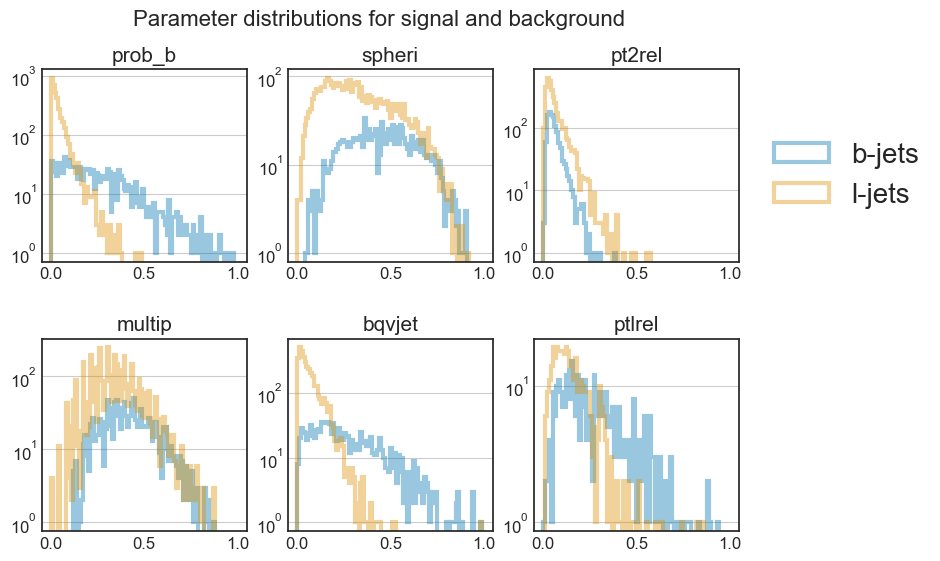

In [19]:
# Show 1D distributions
fig, ax = plt.subplots(nrows=2, ncols=3, gridspec_kw={'wspace':0.2, 'hspace':0.4}, figsize=(9,6))
ax = ax.flatten()

# Loop over features
for i in range(len(features)):
    ax[i].set_title(features[i], fontsize=15)
    ax[i].tick_params(axis="x", labelsize=12) 
    ax[i].tick_params(axis="y", labelsize=12) 
    ax[i].set_yscale("log")
    ax[i].grid(axis='y')
    
    _, bins_arr, _ = ax[i].hist(data[features[i]][isb == 1], bins=Nbins, range=(xmin, xmax), zorder=2,
                                linewidth=3, label='b-jets', alpha=0.4, histtype='step')
    
    _, bins_arr, _ = ax[i].hist(data[features[i]][isb == 0], bins=Nbins, range=(xmin, xmax), zorder=2,
                                linewidth=3, label='l-jets', alpha=0.4, histtype='step')

ax[2].legend(loc='upper right', bbox_to_anchor=(2, 0.75), fancybox=True, shadow=False, fontsize=20)
fig.suptitle('Parameter distributions for signal and background', fontsize=16)
#fig.tight_layout()
plt.show()

### 6x6 plot of the variable distributions (diagonal) and their mutual correlations (off-diagonal):

In [ ]:
# 6x6 plot of the variable distributions (diagonal) and their mutual correlations (off-diagonal):
df = pd.DataFrame(data)                                        # Make the data into a DataFrame
df = df.drop(['energy','cTheta','phi','nnbjet'], axis=1)       # Drop the irrelevant variables

sns.pairplot(df, hue="isb", diag_kind='kde'); # choose diag_kind='kde' for faster running (instead of histograms)

### Plot of the variable correlation (here Pearson, i.e. linear)

Correlations for ALL events
          prob_b    spheri    pt2rel    multip    bqvjet    ptlrel       isb
prob_b  1.000000  0.215843 -0.044106  0.161979  0.750507  0.178093  0.651354
spheri  0.215843  1.000000 -0.044416  0.245822  0.197456  0.068243  0.278414
pt2rel -0.044106 -0.044416  1.000000  0.309295 -0.020872  0.081342  0.000299
multip  0.161979  0.245822  0.309295  1.000000  0.213691  0.057460  0.229967
bqvjet  0.750507  0.197456 -0.020872  0.213691  1.000000  0.123497  0.563827
ptlrel  0.178093  0.068243  0.081342  0.057460  0.123497  1.000000  0.299047
isb     0.651354  0.278414  0.000299  0.229967  0.563827  0.299047  1.000000


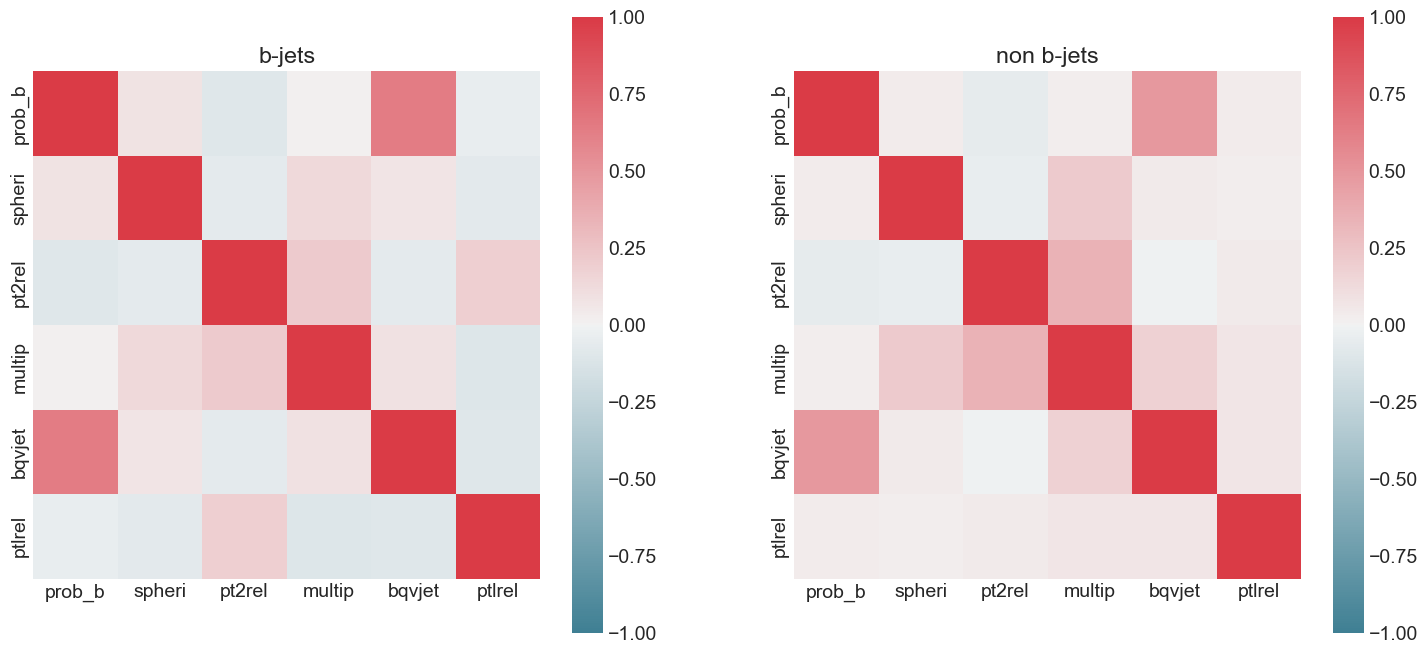

In [9]:
# First print the correlations for ALL events (both b-jets and non-b-jets):
print('Correlations for ALL events')
print(df.corr(method='pearson'))  

# Divide data into b-jets and non-b-jets:
df_b = df.loc[df['isb'] == 1].drop(['isb'], axis=1)
df_l = df.loc[df['isb'] == 0].drop(['isb'], axis=1)

# Make two separate correlation plots, also to see differences:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(df_b.corr(), mask=np.zeros_like(df_b.corr(), dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax[0])

sns.heatmap(df_l.corr(), mask=np.zeros_like(df_l.corr(), dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax[1])

ax[0].set_title('b-jets')
ax[1].set_title('non b-jets');

#### Comments on plots:

As can be seen, the variables correlate similarly between the two types of jets. In particular 'prob_b' and 'bqvjet' are very correlated, which is the reason why performance doesn't increase a lot, when both of these powerful variables are included: They hold similar power, which can only be used once!

The variable 'ptlrel' is not very correlated to any other variables, which means that it contributes no matter which other variables are included. Of course in the end, one wants to include all variables.

# Example Solution 1: Manual Decision Tree
- Choose three variables for simplicity: propb, bqvjet, ptlrel
- Select cuts based on the variable distributions and the correlation plots

In [10]:
#Here starts the example solution!
   
# I give the selection cuts names, so that they only need to be changed in ONE place (also ensures consistency!):
loose_propb = 0.10
tight_propb = 0.16
loose_bqvjet = 0.12
tight_bqvjet = 0.28
loose_ptlrel = 0.40
tight_ptlrel = 0.60

bquark=[]
for i in np.arange(len(prob_b)):
    if   (prob_b[i] > tight_propb)  : bquark.append(1)
    elif (bqvjet[i] > tight_bqvjet) : bquark.append(1)
    elif (ptlrel[i] > tight_ptlrel) : bquark.append(1)
    elif ((prob_b[i] > loose_propb)  and (bqvjet[i] > loose_bqvjet)) : bquark.append(1)
    elif ((prob_b[i] > loose_propb)  and (ptlrel[i] > loose_ptlrel)) : bquark.append(1)
    elif ((bqvjet[i] > loose_bqvjet) and (ptlrel[i] > loose_ptlrel)) : bquark.append(1)
    elif ((ptlrel[i] > 0.3) and (prob_b[i] > 0.08) and (bqvjet[i] > 0.10)) : bquark.append(1)  # Adds very little!
    else : bquark.append(0)

### Evaluate the selection

In [11]:
N, accuracy, fracWrong = evaluate(bquark)
print("\nRESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)


RESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:
  First number in parenthesis is the estimate, second is the MC truth:
  True-Negative (0,0)  =  3588
  False-Negative (0,1) =  326
  False-Positive (1,0) =  234
  True-Positive (1,1)  =  852
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.112
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.888


### Compare with NN-approach from 1990'ies:

In [12]:
bquark=[]
for i in np.arange(len(prob_b)):
    if   (nnbjet[i] > 0.82) : bquark.append(1)
    else : bquark.append(0)

N, accuracy, fracWrong = evaluate(bquark)
print("\nALEPH BJET TAG:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)


ALEPH BJET TAG:
  First number in parenthesis is the estimate, second is the MC truth:
  True-Negative (0,0)  =  3700
  False-Negative (0,1) =  372
  False-Positive (1,0) =  122
  True-Positive (1,1)  =  806
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.0988
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.9012


## Comment on Example Solution 1:

I simply chose to simplify the problem by choosing only three variables and then making an "if-elif-else" selection with these, cutting out the regions with most b-quarks in them, and leaving the rest as non-b-quarks. Some of these regions contribute very little.

The choice of three variables is also not simple, because variables may look good, but if they are very correlated with other variables (like "prob_b" and "bqvjet"), then they might not contribute that much in addition. This was also the reason for choosing "ptlrel" as the third variable.

The solution gets a wrong fraction of <b>0.112</b>, which is reasonably good, though not close to the Aleph NN solution of <b>0.0988</b>.

# Example Solution 2: Brute force looping over selection values to get "optimal" selection:

- Loop over different randomly chosen cuts in order to optimize the classification

In [13]:
# Here I make a range of values (min, max) from which I choose (randomly - more on that) from:
range_loose_prob_b = [0.08, 0.11]
range_tight_prob_b = [0.16, 0.21]
range_loose_bqvjet = [0.13, 0.18]
range_tight_bqvjet = [0.28, 0.40]
range_loose_ptlrel = [0.20, 0.40]
range_tight_ptlrel = [0.45, 0.65]

# The current best (i.e. lowest) fraction wrong. Set high initially, and lowered by better selections:
fracWrong_min = 0.999

# Try several times (here 100):
for Ntest in range(100) :

    # Choose random selection and test it:
    loose_prob_b = r.uniform(range_loose_prob_b[0], range_loose_prob_b[1])
    tight_prob_b = r.uniform(range_tight_prob_b[0], range_tight_prob_b[1])
    loose_bqvjet = r.uniform(range_loose_bqvjet[0], range_loose_bqvjet[1])
    tight_bqvjet = r.uniform(range_tight_bqvjet[0], range_tight_bqvjet[1])
    loose_ptlrel = r.uniform(range_loose_ptlrel[0], range_loose_ptlrel[1])
    tight_ptlrel = r.uniform(range_tight_ptlrel[0], range_tight_ptlrel[1])

    bquark=[]
    for i in np.arange(len(prob_b)):
        if   (prob_b[i] > tight_prob_b) : bquark.append(1)
        elif (bqvjet[i] > tight_bqvjet) : bquark.append(1)
        elif (ptlrel[i] > tight_ptlrel) : bquark.append(1)
        elif ((prob_b[i] > loose_prob_b) and (bqvjet[i] > loose_bqvjet)) : bquark.append(1)
        elif ((prob_b[i] > loose_prob_b) and (ptlrel[i] > loose_ptlrel)) : bquark.append(1)
        elif ((bqvjet[i] > loose_bqvjet) and (ptlrel[i] > loose_ptlrel)) : bquark.append(1)
        else : bquark.append(0)

    N, accuracy, fracWrong = evaluate(bquark)

    # Flag/print best selection(s):
    if (fracWrong < fracWrong_min) :
        print("\nRESULT OF TESTING MANY SELECTION CUTS:")
        print("  First number is my estimate, second is the MC truth:", Ntest)
        print("  True-Negative (0,0)  = ", N[0][0])
        print("  False-Negative (0,1) = ", N[0][1])
        print("  False-Positive (1,0) = ", N[1][0])
        print("  True-Positive (1,1)  = ", N[1][1])
        print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
        print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)           

        fracWrong_min = fracWrong
        print("  GOT A NEW MINIMUM.... GREAT!")
        print("  loose_prob_b = ", loose_prob_b)
        print("  tight_prob_b = ", tight_prob_b)
        print("  loose_bqvjet = ", loose_bqvjet)
        print("  tight_bqvjet = ", tight_bqvjet)
        print("  loose_ptlrel = ", loose_ptlrel)
        print("  tight_ptlrel = ", tight_ptlrel)



RESULT OF TESTING MANY SELECTION CUTS:
  First number is my estimate, second is the MC truth: 0
  True-Negative (0,0)  =  3650
  False-Negative (0,1) =  373
  False-Positive (1,0) =  172
  True-Positive (1,1)  =  805
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.109
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.891
  GOT A NEW MINIMUM.... GREAT!
  loose_prob_b =  0.09123620356542088
  tight_prob_b =  0.2075357153204958
  loose_bqvjet =  0.16659969709057026
  tight_bqvjet =  0.35183901810364443
  loose_ptlrel =  0.23120372808848733
  tight_ptlrel =  0.48119890406724053

RESULT OF TESTING MANY SELECTION CUTS:
  First number is my estimate, second is the MC truth: 4
  True-Negative (0,0)  =  3615
  False-Negative (0,1) =  337
  False-Positive (1,0) =  207
  True-Positive (1,1)  =  841
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.1088
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.8912
  GOT A NEW MINIMUM.... GREAT!
  loose_prob_

## Comments on example solution 2:

This solution simply expands on the first solution by searching for better parameters of the first solution. There are six parameters, and one can either do nested loops over all six, or... choose points at random! We'll discuss these approaches more.

This solution improves the wrong fraction from <b>0.112</b> to <b>0.1078</b>, which is marginally better, though still not close to the Aleph NN solution of <b>0.0988</b>.

## Example solution 3: Decision Tree using sklearn.tree.DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
import pandas as pd
import graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display

In [15]:
data_xx = np.column_stack((prob_b,spheri,pt2rel,multip,bqvjet,ptlrel))
data_yy = isb
X = pd.DataFrame(data_xx, columns=['prob_b', 'spheri','pt2rel','multip','bqvjet','ptlrel'])
y = pd.Series(data_yy, name='b-quark')

In [16]:
def plot_tree(depth, Nmin):
    tree_clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=Nmin)
    tree_clf.fit(X, y)
    graph = Source(tree.export_graphviz(tree_clf, out_file=None, filled = True))
    display(SVG(graph.pipe(format='svg')))
    return tree_clf

In [17]:
decision_plot = interactive(plot_tree, depth=(1,7), Nmin=(1,50))
display(decision_plot)

interactive(children=(IntSlider(value=4, description='depth', max=7, min=1), IntSlider(value=25, description='…

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=25)
tree_clf.fit(X, y)

N, accuracy, fracWrong = evaluate(bquark)
print("\nDecision Tree BJET TAG:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)


Decision Tree BJET TAG:
  First number in parenthesis is the estimate, second is the MC truth:
  True-Negative (0,0)  =  3642
  False-Negative (0,1) =  367
  False-Positive (1,0) =  180
  True-Positive (1,1)  =  811
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.1094
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.8906000000000001


## Comment on example solution 3:

This solution - a Decision Tree (from SKlearn) - is fundamentally different, as it is mostly automated, though it is still simple. However, 

improves the wrong fraction from <b>0.112</b> to <b>0.1078</b>, which is marginally better, though still not close to the Aleph NN solution of <b>0.0988</b>.

## My Solution 4: Decision Tree using XGBoost

In [26]:
#data = np.genfromtxt('AlephBtag_MC_train_Nev5000.csv', names=True)

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss, precision_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [31]:
# All X and y data in seperate dataframes
X = pd.DataFrame(data[features])
y = pd.DataFrame(data['isb'])

In [32]:
# Splitting the data into train, validation and test with ratios 80:10:10
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.50, random_state=42)

In [34]:
# Performing a gridsearch to find the optimal depth and number of estimators

# define model
model_temp = XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                           learning_rate=0.1, seed=42, use_label_encoder=False)

max_depth_range = [4,5,6,7,8,9]
n_estimators_range = [50,60,70,80,100,120,150]

# Specify parameters and distributions to sample from
parameters_GridSearch = {'max_depth': max_depth_range, 
                         'n_estimators': n_estimators_range}

# Chose number of iterations and number of folds
k = 5

GridSearch = GridSearchCV(model_temp, 
                          param_grid=parameters_GridSearch, 
                          cv=k, 
                          return_train_score=True,
                          scoring = 'accuracy')

# Fit the random search instance
GridSearch.fit(X_train, y_train);

# Get results
GridSearch_results = pd.DataFrame(GridSearch.cv_results_)                 
print("Grid Search: \tBest parameters: ", GridSearch.best_params_, f", Best scores: {GridSearch.best_score_:.3f}")

GridSearch_results.head(3)

Grid Search: 	Best parameters:  {'max_depth': 6, 'n_estimators': 60} , Best scores: 0.901


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116274,0.009569,0.002132,0.000269,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.8875,0.91000,0.90500,...,0.9000,0.007583,4,0.926875,0.919063,0.920937,0.920000,0.921562,0.921687,0.002729
1,0.131671,0.003183,0.002171,0.000072,4,60,"{'max_depth': 4, 'n_estimators': 60}",0.8900,0.91125,0.90375,...,0.9005,0.007009,3,0.927813,0.920312,0.922813,0.920937,0.925000,0.923375,0.002756
2,0.147596,0.001867,0.002234,0.000071,4,70,"{'max_depth': 4, 'n_estimators': 70}",0.8900,0.90875,0.90000,...,0.8990,0.005990,8,0.931250,0.920625,0.924375,0.922813,0.926875,0.925188,0.003653


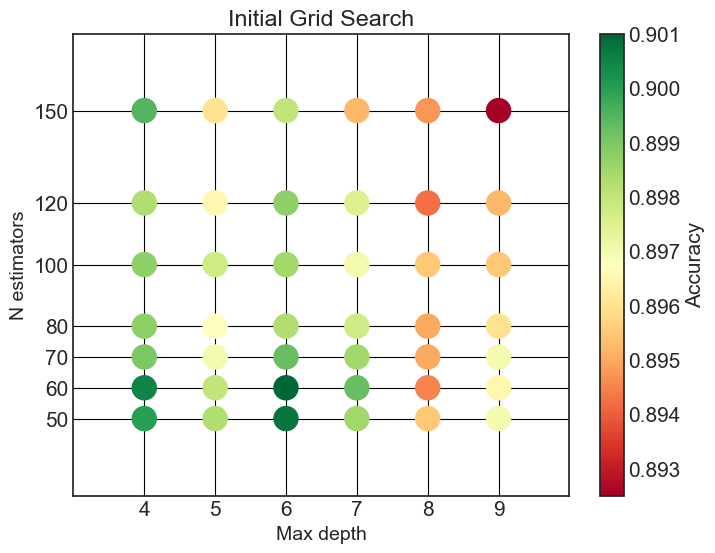

In [36]:
# parameters
x1 = GridSearch_results['param_max_depth']
x2 = GridSearch_results['param_n_estimators']

# color corresponding to test score
color = GridSearch_results['mean_test_score']
mini, maxi = np.min(color), np.max(color) 

# gridsearch
fig, ax = plt.subplots(figsize=(8,6))


im = ax.scatter(x1, x2, s=300, c = color, cmap='RdYlGn', zorder=2)

ax.set(xlabel='Max depth', ylabel='N estimators', title='Initial Grid Search', 
       xlim=(max_depth_range[0]-1,max_depth_range[-1]+1), ylim=(n_estimators_range[0]-25,n_estimators_range[-1]+25),
       xticks = max_depth_range, yticks=n_estimators_range)

ax.tick_params(axis="x", labelsize=15) 
ax.tick_params(axis="y", labelsize=15)
ax.grid(color='k')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Accuracy', fontsize=15, x=1.7)
cbar.ax.tick_params(labelsize=15);

In [37]:
xgb_clf = XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                        max_depth=6, eval_metric='logloss', n_estimators=70,
                        seed=42, use_label_encoder=False)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_val)
acc = accuracy_score(y_pred, y_val)
print(f"Train accuracy: {acc*100.0:.2f}%")

Train accuracy: 89.00%


# My Solution 5: Decision Tree using LightGBM

## LightGBM parameters:
https://neptune.ai/blog/lightgbm-parameters-guide

### Boosting types

**Gradient Boosting Decision Tree (GBDT).** 

So in the gbdt method we have a lot of decision trees(weak learners). Those trees are built sequentially:

- first tree learns how to fit to the target variable
- second tree learns how to fit to the residual (difference) between the predictions of the first tree and the ground truth
-  third tree learns how to fit the residuals of the second tree and so on.

All those trees are trained by propagating the gradients of errors throughout the system.The main drawback of gbdt is that finding the best split points in each tree node is time-consuming and memory-consuming operation other boosting methods try to tackle that problem. pros: accuracy, efficiency, and stability. 

**Dropout Additive Regression Trees (DART)**

A method that uses  dropout, standard in Neural Networks, to improve model regularization and deal with some other less-obvious problems. 

**Gradient-based One-Side Sampling (GOSS)**

pros: converge faster. cons: overfitting when dataset is small

In [50]:
import lightgbm as lgb 

data_train = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,  # max number of leaves each weak learner has -> controls the complexity of the model
          'max_depth': 5,
          'min_data': 10,
          'verbose': 0,
          'force_col_wise': True}

lgb_clf = lgb.train(params, train_set=data_train, num_boost_round=300)
y_pred = np.around(lgb_clf.predict(X_val))
acc = accuracy_score(y_pred, y_val)
print(f"Train accuracy: {acc*100.0:.2f}%")

Train accuracy: 90.20%


## My solution 6: Neural Network using Tensorflow

Rule of thumbs for contructing a Neural Network (examples using Tensorflow)

https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

In [67]:
# set up the network hyperparameters
n_inputs = 6   # number of inputs: 6 features
n_hidden1 = 10 # number of neurons in first hidden layer: 10
n_hidden2 = 10 # number of neurons in second hidden layer: 10
n_outputs = 1  # number of outputs: 1 (can be either 0 or 1)
learning_rate = 0.001  # learning rate - where do I use this ??  maybe optimizer?
init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in')

In [68]:
# network structure
model_tf = Sequential([
    Dense(n_inputs, activation='relu',  name = 'input_layer'), # kernel_initializer=init,
    Dense(n_hidden1, activation='relu', name = 'hidden_layer_1'),
    Dense(n_hidden2, activation='relu', name = 'hidden_layer_2'),
    Dense(n_outputs, activation='sigmoid', name = 'output_layer')])

In [69]:
# compiling model
model_tf.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(), # binary loss function
                 metrics=['accuracy'])
                 #metrics=[tf.keras.losses.BinaryCrossentropy()])
               

In [70]:
# training model
n_epochs = 30
batch_size = 32

print('--------- TRAINING ---------')
history = model_tf.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

--------- TRAINING ---------
Epoch 1/30
125/125 [==============================] - 1s 7ms/step - loss: 0.6225 - accuracy: 0.7680 - val_loss: 0.5781 - val_accuracy: 0.7540
Epoch 2/30
125/125 [==============================] - 1s 6ms/step - loss: 0.5154 - accuracy: 0.7785 - val_loss: 0.4648 - val_accuracy: 0.7940
Epoch 3/30
125/125 [==============================] - 1s 6ms/step - loss: 0.3693 - accuracy: 0.8598 - val_loss: 0.3190 - val_accuracy: 0.8720
Epoch 4/30
125/125 [==============================] - 1s 6ms/step - loss: 0.2878 - accuracy: 0.8908 - val_loss: 0.2703 - val_accuracy: 0.8920
Epoch 5/30
125/125 [==============================] - 1s 6ms/step - loss: 0.2691 - accuracy: 0.8963 - val_loss: 0.2580 - val_accuracy: 0.9000
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 0.2638 - accuracy: 0.8993 - val_loss: 0.2554 - val_accuracy: 0.9000
Epoch 7/30
125/125 [==============================] - 1s 6ms/step - loss: 0.2613 - accuracy: 0.8980 - val_loss: 0.2532 

### Plotting results: Accuracy and Loss vs. N Epochs

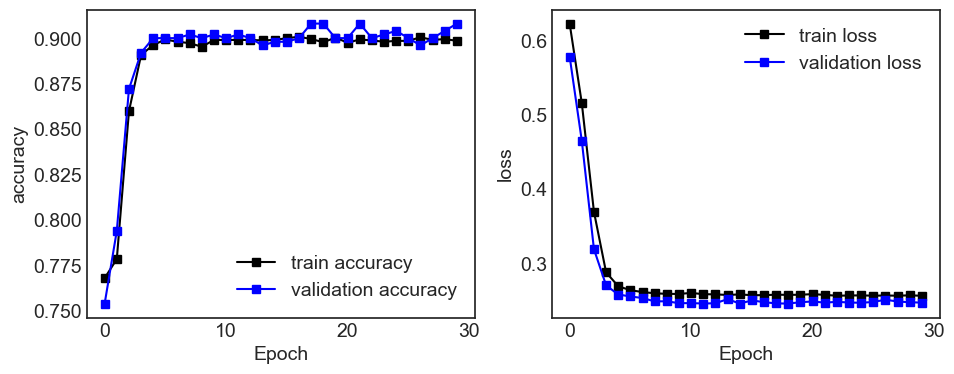

In [71]:
fig, ax = plt.subplots(1,2, figsize=(11, 4))
ax[0].plot(np.arange(n_epochs), history.history['accuracy'], 'ks-', label='train accuracy')
ax[0].plot(np.arange(n_epochs), history.history['val_accuracy'], 'bs-', label='validation accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(np.arange(n_epochs), history.history['loss'], 'ks-', label='train loss')
ax[1].plot(np.arange(n_epochs), history.history['val_loss'], 'bs-', label='validation loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()
plt.show()

### Compare model predictions to the benchmark data set (Aleph)

In [72]:
benchmark_data  = data['nnbjet'] # Aleph predictions
y_true = data['isb']             # true values

16/16 [==============================] - 0s 2ms/step


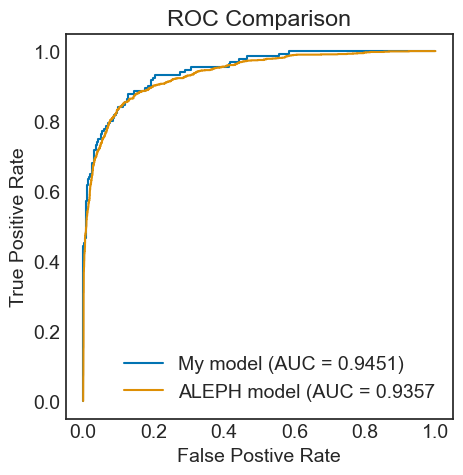

In [73]:
# Make predictions on test data!
y_pred = model_tf.predict(X_test)

# FPR and TPR for our model and for ALEPH model
fpr, tpr, _ = roc_curve(y_test, y_pred)      
fpr_nnbjet, tpr_nnbjet, _ = roc_curve(y_true, benchmark_data)

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                         # this is auc score for our model
auc_score_nnbjet = auc(fpr_nnbjet, tpr_nnbjet)   # this is the auc score for nnbjet

# Plot the results:
fig = plt.figure(figsize = [5,5])
plt.title('ROC Comparison')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,        tpr,        label = f'My model (AUC = {auc_score:6.4f})')
plt.plot(fpr_nnbjet, tpr_nnbjet, label = f'ALEPH model (AUC = {auc_score_nnbjet:6.4f}')
plt.legend(loc='lower right');